# 使用循環神經網絡（RNN）自然語言處理（NLP）

### Step 1：**資料準備**
1. **資料清理**：
   - 移除雜訊，如特殊字符、URL、不必要的空格等。
2. **分詞（Tokenization）**：
   - 將文本分割成詞或子詞（如 WordPiece、BPE）。
3. **編碼（Encoding）**：
   - 將分詞結果轉換為數字表示。
   - 常見的方法包括：
     - One-hot 編碼
     - 詞嵌入（如 Word2Vec、GloVe）
     - 預訓練嵌入（如 BERT 或 GPT）

In [7]:
# 資料清理
import re
import string

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    cleaned_text = clean_text(sample_text)
    print("Original Text:\n", sample_text)
    print("\nCleaned Text:\n", cleaned_text)

Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp


### 分詞（Tokenization）

In [14]:
import re
import string

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and unnecessary whitespaces.
    """
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Normalize whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

def tokenize_text(text):
    """
    Tokenizes the cleaned text into words using Python's built-in methods.
    """
    # Split text by whitespace
    tokens = text.split()
    return tokens

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    print("Original Text:\n", sample_text)

    # Clean the text
    cleaned_text = clean_text(sample_text)
    print("\nCleaned Text:\n", cleaned_text)

    # Tokenize the text
    tokenized_text = tokenize_text(cleaned_text)
    print("\nTokenized Text:\n", tokenized_text)


Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp

Tokenized Text:
 ['check', 'out', 'this', 'amazing', 'blog', 'at', 'contact', 'us', 'via', 'email', 'testexamplecom', 'or', 'call', 'python', 'nlp']


### 編碼（Encoding）-- One-hot encoding

In [15]:
import re

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and unnecessary whitespaces.
    """
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Normalize whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

def tokenize_text(text):
    """
    Tokenizes the cleaned text into words using Python's built-in methods.
    """
    # Split text by whitespace
    tokens = text.split()
    return tokens

def one_hot_encode(tokens):
    """
    Converts a list of tokens into a one-hot encoded representation.
    
    Parameters:
        tokens (list): List of tokens from tokenized text.

    Returns:
        tuple: A dictionary mapping words to indices and a one-hot encoded list of lists.
    """
    # Create a vocabulary of unique tokens
    vocabulary = sorted(set(tokens))
    word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
    
    # Generate one-hot encoding for each token
    one_hot_vectors = []
    for token in tokens:
        one_hot_vector = [0] * len(vocabulary)
        one_hot_vector[word_to_index[token]] = 1
        one_hot_vectors.append(one_hot_vector)
    
    return word_to_index, one_hot_vectors

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    print("Original Text:\n", sample_text)

    # Clean the text
    cleaned_text = clean_text(sample_text)
    print("\nCleaned Text:\n", cleaned_text)

    # Tokenize the text
    tokenized_text = tokenize_text(cleaned_text)
    print("\nTokenized Text:\n", tokenized_text)

    # One-hot encode the tokens
    word_to_index, one_hot_vectors = one_hot_encode(tokenized_text)
    print("\nWord to Index Mapping:\n", word_to_index)
    print("\nOne-Hot Encoded Vectors:")
    for vector in one_hot_vectors:
        print(vector)


Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp

Tokenized Text:
 ['check', 'out', 'this', 'amazing', 'blog', 'at', 'contact', 'us', 'via', 'email', 'testexamplecom', 'or', 'call', 'python', 'nlp']

Word to Index Mapping:
 {'amazing': 0, 'at': 1, 'blog': 2, 'call': 3, 'check': 4, 'contact': 5, 'email': 6, 'nlp': 7, 'or': 8, 'out': 9, 'python': 10, 'testexamplecom': 11, 'this': 12, 'us': 13, 'via': 14}

One-Hot Encoded Vectors:
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### 編碼 (Encoding) -- 詞嵌入（如 Word2Vec、GloVe）

In [20]:
import re
from gensim.models import Word2Vec

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and unnecessary whitespaces.
    """
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Normalize whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

def tokenize_text(text):
    """
    Tokenizes the cleaned text into words using Python's built-in methods.
    """
    # Split text by whitespace
    tokens = text.split()
    return tokens

def train_word2vec(sentences, vector_size=100, window=5, min_count=1):
    """
    Trains a Word2Vec model on the provided sentences.

    Parameters:
        sentences (list of list of str): Tokenized sentences.
        vector_size (int): Dimensionality of the word vectors.
        window (int): Maximum distance between the current and predicted word.
        min_count (int): Ignores all words with total frequency lower than this.

    Returns:
        Word2Vec: Trained Word2Vec model.
    """
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=1)
    return model

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    print("Original Text:\n", sample_text)

    # Clean the text
    cleaned_text = clean_text(sample_text)
    print("\nCleaned Text:\n", cleaned_text)

    # Tokenize the text
    tokenized_text = tokenize_text(cleaned_text)
    print("\nTokenized Text:\n", tokenized_text)

    # Prepare data for Word2Vec (list of tokenized sentences)
    sentences = [tokenized_text]  # List of sentences, each sentence is a list of tokens

    # Train Word2Vec model
    word2vec_model = train_word2vec(sentences)
    print("\nWord2Vec Embeddings:")
    for word in word2vec_model.wv.index_to_key:
        print(f"{word}: {word2vec_model.wv[word]}")


Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp

Tokenized Text:
 ['check', 'out', 'this', 'amazing', 'blog', 'at', 'contact', 'us', 'via', 'email', 'testexamplecom', 'or', 'call', 'python', 'nlp']

Word2Vec Embeddings:
nlp: [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774

### 編碼 (Encoding) -- Word emgedding(GloVe)
Download pre-trained word vectors from [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)

In [1]:
import re
import numpy as np

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and unnecessary whitespaces.
    """
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Normalize whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

def tokenize_text(text):
    """
    Tokenizes the cleaned text into words using Python's built-in methods.
    """
    # Split text by whitespace
    tokens = text.split()
    return tokens

def load_glove_embeddings(glove_file_path):
    """
    Loads GloVe embeddings from a file.

    Parameters:
        glove_file_path (str): Path to the GloVe embeddings file.

    Returns:
        dict: A dictionary mapping words to their GloVe embeddings.
    """
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index

def get_sentence_embedding(tokens, embeddings_index):
    """
    Computes the sentence embedding by averaging GloVe embeddings of words.

    Parameters:
        tokens (list): List of tokens from the sentence.
        embeddings_index (dict): GloVe word embeddings dictionary.

    Returns:
        np.ndarray: The sentence embedding as a vector.
    """
    embedding_dim = len(next(iter(embeddings_index.values())))  # Dimension of GloVe embeddings
    sentence_embedding = np.zeros(embedding_dim)
    valid_tokens = 0

    for token in tokens:
        if token in embeddings_index:
            sentence_embedding += embeddings_index[token]
            valid_tokens += 1

    if valid_tokens > 0:
        sentence_embedding /= valid_tokens

    return sentence_embedding

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    print("Original Text:\n", sample_text)

    # Clean the text
    cleaned_text = clean_text(sample_text)
    print("\nCleaned Text:\n", cleaned_text)

    # Tokenize the text
    tokenized_text = tokenize_text(cleaned_text)
    print("\nTokenized Text:\n", tokenized_text)

    # Load GloVe embeddings (download GloVe file and provide the correct path)
    glove_file_path = "../data/glove.6B/glove.6B.50d.txt"  # Example file: 50-dimensional GloVe vectors
    print("\nLoading GloVe embeddings...")
    glove_embeddings = load_glove_embeddings(glove_file_path)

    # Compute sentence embedding
    sentence_embedding = get_sentence_embedding(tokenized_text, glove_embeddings)
    print("\nSentence Embedding:\n", sentence_embedding)

Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp

Tokenized Text:
 ['check', 'out', 'this', 'amazing', 'blog', 'at', 'contact', 'us', 'via', 'email', 'testexamplecom', 'or', 'call', 'python', 'nlp']

Loading GloVe embeddings...

Sentence Embedding:
 [ 0.28071099  0.21005214  0.21466415  0.15691272  0.18694929 -0.11066272
 -0.463882   -0.355695    0.0805194   0.04124065 -0.17067784  0.21215452
  0.05459714 -0.10500858  0.32907079  0.02541357 -0.26532748 -0.16344179
 -0.30950393 -0.11786607  0.22847564  0.215925    0.42892586  0.24820764
  0.323294   -1.00813928  0.03517129 -0.14934993  0.23746585 -0.37186436
  2.52624642  0.07874621 -0.3274235  -0.08321058 -0.16669921 -0.04749864
  0.06699258 -0.15182529  0.05304036 -0.10111173  0.55109912  0.08533421
 -0.09511235  0.362007

### 預訓練嵌入（ BERT, Bidirectional Encoder Representations from Transformers)

### 什麼是 BERT？

BERT（**Bidirectional Encoder Representations from Transformers**）是一個由 Google 開發的強大自然語言處理（NLP）模型，於 2018 年由 Jacob Devlin 等人在論文 ["BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"](https://arxiv.org/abs/1810.04805) 中首次提出。BERT 在許多 NLP 任務中（如問題回答、情感分析和命名實體識別）達到了最先進的效果，並徹底改變了 NLP 的發展。

---

### BERT 的主要特點

1. **雙向語境理解**：
   - BERT 是**雙向的**，可以同時從左到右和從右到左閱讀文本，全面理解單詞的上下文。
   - 傳統模型（如 RNN 或早期的 Transformer）通常是單向的，無法充分理解完整語境。

2. **基於 Transformer 的架構**：
   - BERT 基於 Transformer 模型，它使用**自注意力機制（Self-Attention Mechanism）**來高效處理輸入文本並捕捉單詞之間的關係，無論它們之間的距離有多遠。

3. **預訓練與微調（Fine-tuning）**：
   - **預訓練**：
     - BERT 在大型文本語料庫（如 Wikipedia 和 BooksCorpus）上進行預訓練，採用以下兩種無監督任務：
       1. **遮罩語言模型（Masked Language Modeling, MLM）**：隨機遮罩文本中的部分單詞，並讓模型預測這些單詞。
       2. **下一句預測（Next Sentence Prediction, NSP）**：預測兩個句子是否邏輯上相連。
   - **微調**：
     - 預訓練完成後，BERT 可以根據具體任務（如情感分析、機器翻譯）使用有標籤的數據進行微調。

4. **預訓練模型的不同版本**：
   - `bert-base`：12 層（Transformer blocks），768 個隱藏單元，12 個注意力頭，共 1.1 億參數。
   - `bert-large`：24 層，1024 個隱藏單元，16 個注意力頭，共 3.4 億參數。

---

### 為什麼 BERT 很重要？

1. **最先進的性能**：
   - BERT 在多個 NLP 基準任務（如 GLUE 基準測試、SQuAD 問答數據集等）上創造了新紀錄。

2. **語境化詞嵌入**：
   - 傳統詞嵌入模型（如 Word2Vec 或 GloVe）為單詞生成固定的嵌入，而 BERT 的嵌入會根據上下文動態變化。
   - 例如，“bank” 在 “river bank” 和 “financial bank” 中的嵌入不同。

3. **廣泛的應用**：
   - BERT 被應用於多種任務：
     - 文本分類（如情感分析）。
     - 命名實體識別（NER）。
     - 問答系統（如 SQuAD）。
     - 文本摘要和改寫。

---

### BERT 的工作原理

#### 1. **輸入表示**
   - BERT 的輸入包含以下部分：
     - **詞嵌入（Token Embeddings）**：表示單詞或子詞（WordPiece Tokenization）。
     - **段落嵌入（Segment Embeddings）**：標識輸入的句子邊界（用於句子對任務）。
     - **位置嵌入（Positional Embeddings）**：編碼每個單詞在序列中的位置。

#### 2. **自注意力機制（Self-Attention）**
   - BERT 的 Transformer 架構通過自注意力機制來捕捉句子中所有單詞的關聯，無論距離遠近。

#### 3. **預訓練任務**
   - **遮罩語言模型（MLM）**：
     - 隨機遮罩 15% 的單詞，讓模型預測被遮罩的單詞。
   - **下一句預測（NSP）**：
     - 判斷兩個句子是否邏輯上相連。

#### 4. **微調**
   - 在預訓練完成後，BERT 可以通過微調適配特定的 NLP 任務。

---

### BERT 的應用

1. **問題回答（Question Answering）**：
   - 給定問題和上下文，BERT 可以提取準確的答案範圍。
2. **文本分類（Text Classification）**：
   - 任務如情感分析、垃圾郵件檢測和主題分類。
3. **命名實體識別（NER）**：
   - 提取文本中的命名實體（如人名、日期、地點）。
4. **搜索引擎**：
   - Google 使用 BERT 提升對搜索查詢的理解。

---

### BERT 的優勢

- 雙向上下文感知，理解單詞的完整語境。
- 在多個 NLP 任務上實現最先進的性能。
- 開放源代碼，且易於使用（如 Hugging Face 的 Transformers 庫）。
- 可以通過微調輕鬆遷移到具體任務。

### BERT 的挑戰

- **計算成本高**：訓練和推理都需要大量計算資源。
- **內存需求大**：特別是 `bert-large` 等較大版本。
- **微調需要足夠的數據**：對於小型數據集可能效果有限。

---

### 小結

BERT 結合了雙向上下文、Transformer 架構和創新的預訓練策略，使其在自然語言理解中取得了重大突破。它已成為許多 NLP 模型和應用的基礎，為搜索引擎、對話系統和文本分類等應用提供強大的支持。

In [6]:
import re
from transformers import BertTokenizer, BertModel
import torch

def clean_text(text):
    """
    Cleans the input text by removing URLs, special characters, and unnecessary whitespaces.
    """
    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)

    # Remove special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Normalize whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

def tokenize_text(text):
    """
    Tokenizes the cleaned text into words using Python's built-in methods.
    """
    # Split text by whitespace
    tokens = text.split()
    return tokens

def get_bert_embeddings(text, model, tokenizer):
    """
    Generates BERT embeddings for the given text.

    Parameters:
        text (str): Input text.
        model: Pretrained BERT model.
        tokenizer: BERT tokenizer.

    Returns:
        torch.Tensor: The BERT embeddings for the input text.
    """
    # Tokenize and encode input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    
    # Generate embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the embeddings (last hidden state)
    embeddings = outputs.last_hidden_state
    return embeddings

# Example usage
if __name__ == "__main__":
    sample_text = """
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    """
    print("Original Text:\n", sample_text)

    # Clean the text
    cleaned_text = clean_text(sample_text)
    print("\nCleaned Text:\n", cleaned_text)

    # Tokenize the text
    tokenized_text = tokenize_text(cleaned_text)
    print("\nTokenized Text:\n", tokenized_text)

    # Load BERT model and tokenizer
    print("\nLoading BERT model...")
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Get BERT embeddings
    print("\nGenerating BERT embeddings...")
    embeddings = get_bert_embeddings(cleaned_text, model, tokenizer)
    print("\nBERT Embeddings Shape:", embeddings.shape)
    print("BERT Embeddings (First Token):", embeddings[0][0])

Original Text:
 
    Check out this amazing blog at https://example.com!
    Contact us via email: test@example.com or call +123-456-7890.
    #Python #NLP :)
    

Cleaned Text:
 check out this amazing blog at contact us via email testexamplecom or call python nlp

Tokenized Text:
 ['check', 'out', 'this', 'amazing', 'blog', 'at', 'contact', 'us', 'via', 'email', 'testexamplecom', 'or', 'call', 'python', 'nlp']

Loading BERT model...


ImportError: 
BertModel requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFBertModel".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


Epoch 0, Loss: 0.7921696305274963
Epoch 10, Loss: 0.04010596126317978
Epoch 20, Loss: 0.008932550437748432
Epoch 30, Loss: 0.0038160928525030613
Epoch 40, Loss: 0.0023599162232130766
Epoch 50, Loss: 0.0017662409227341413
Epoch 60, Loss: 0.0014507893938571215
Epoch 70, Loss: 0.0012470402289181948
Epoch 80, Loss: 0.0010971329174935818
Epoch 90, Loss: 0.0009782267734408379
Test Accuracy: 100.00%


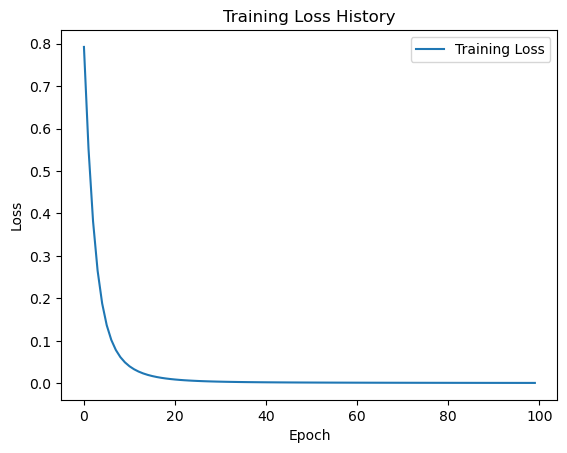

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the RNN Model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, hidden = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last hidden state for classification
        return out

# Parameters
input_size = 1   # Each number in the sequence
hidden_size = 16 # Number of hidden units
output_size = 2  # Two classes: even (0), odd (1)

model = SimpleRNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Data with Padding
inputs = torch.tensor([
    [[1], [2], [3]],  # Sequence 1
    [[4], [6], [0]]   # Sequence 2 (padded with 0)
], dtype=torch.float32)
labels = torch.tensor([0, 0])  # 0 for even, 1 for odd

# Test Data
test_inputs = torch.tensor([
    [[3], [5], [0]],  # Sum = 8 (even)
    [[2], [4], [6]]   # Sum = 12 (even)
], dtype=torch.float32)
test_labels = torch.tensor([0, 0])  # 0 for even, 1 for odd

# Training Loop
epochs = 100
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(test_inputs)
    predictions = torch.argmax(test_outputs, dim=1)
    accuracy = (predictions == test_labels).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

# Plot the training loss
plt.plot(range(epochs), loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss History")
plt.legend()
plt.show()


---

### Step 2：**序列處理**
1. **填充與截斷（Padding and Truncation）**：
   - 確保所有序列的長度一致，短序列用填充符（如 0）補齊，長序列則截斷。
2. **批量處理（Batch Preparation）**：
   - 將資料集劃分為訓練集、驗證集和測試集，並生成小批量資料以提高計算效率。

---

### Step 3：**RNN 模型架構**
1. **輸入層（Input Layer）**：
   - 接收數字化表示的序列資料。
2. **嵌入層（Embedding Layer）**：
   - 如果未使用預訓練嵌入，則將輸入數字轉換為密集向量表示。
3. **RNN 層**：
   - 負責處理序列資料。常見變體包括：
     - 簡單 RNN
     - 長短期記憶（LSTM）網絡
     - 閘門循環單元（GRU）。
4. **全連接層（Dense Layer）**：
   - 將 RNN 的輸出映射到目標維度（例如分類任務中的類別數）。

---

### Step 4：**損失函數**
- 根據任務選擇適合的損失函數：
  - **交叉熵損失（Cross-Entropy Loss）**：用於分類任務。
  - **均方誤差（Mean Squared Error）**：用於回歸任務。

---

### Step 5：**優化器選擇**
- 使用如 Adam、SGD 或 RMSProp 等優化器，幫助最小化損失。

---

### Step 6：**模型訓練**
1. **前向傳播（Forward Propagation）**：
   - 將輸入資料通過 RNN，生成預測結果。
2. **時間反向傳播（BPTT，Backpropagation Through Time）**：
   - 計算序列的梯度並更新權重。
3. **多次訓練（Epochs）**：
   - 對多個小批量進行多輪訓練以保證模型收斂。

---

### Step 7：**模型評估**
- 使用驗證資料進行評估。
- 根據任務需求，評估指標如準確率（Accuracy）、F1分數、或 BLEU 分數（機器翻譯）等。

---

### Step 8：**模型微調**
- 調整超參數，如學習率、Dropout 比例、RNN 層數等。
- 如果使用了預訓練嵌入，可對特定任務進行微調。

---

### Step 9：**部署**
- 保存訓練好的模型。
- 在實際應用中進行推理，如文本分類、情感分析或翻譯。

In [2]:
import string
import numpy as np

def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector

import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text 
                        if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [           
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)
print( vectorizer.vocabulary.items() )

dict_items([('', 0), ('[UNK]', 1), ('i', 2), ('write', 3), ('erase', 4), ('rewrite', 5), ('again', 6), ('and', 7), ('then', 8), ('a', 9), ('poppy', 10), ('blooms', 11)])


In [3]:
import string
import numpy as np

def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector

import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text 
                        if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [           
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
encoded_sentence

[2, 3, 5, 7, 1, 5, 6]

In [4]:
import string
import numpy as np

def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector

import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text 
                        if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [           
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)

decoded_sentence = vectorizer.decode(encoded_sentence)
decoded_sentence

'i write rewrite and [UNK] rewrite again'

# AclImdb dataset

prepare a validation set by setting apart 20% of the training text files in a new directory, `aclImdb/val`

## 1. Load the Dataset
The Stanford IMDb dataset is available in TensorFlow.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load the dataset
max_features = 10000  # Vocabulary size
max_len = 500         # Maximum length of sequences

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Pad sequences to make them of equal length
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

## 2. Define the RNN Model
An RNN model is suitable for sequence data like text.

In [2]:
# Define the RNN model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-03 14:41:11.850950: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-03 14:41:11.850982: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-03 14:41:11.850990: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-03 14:41:11.851010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-03 14:41:11.851024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Train the RNN Model
Use the training data to train the RNN model.

In [ ]:
# Train the model
history = model.fit(
    train_data, 
    train_labels, 
    epochs=5, 
    batch_size=64, 
    validation_split=0.2
)

Epoch 1/5


2024-12-03 14:41:24.006670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-12-03 14:41:24.020396: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


  6/313 ━━━━━━━━━━━━━━━━━━━━ 11:05:40 130s/step - accuracy: 0.4589 - loss: 0.7181

## 4. Evaluate the Model
Test the model on the test dataset.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

## 5. Visualize the Training Process
You can visualize the accuracy and loss over epochs.

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# following parts just for test 

In [50]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("../data/aclImdb")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
for category in ( "neg", "pos" ):
    if not( ( pathlib.Path.cwd() / val_dir / category ).exists() ):
        os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname, 
                    val_dir / category / fname)

## Representing groups of words

`following code run one time only.`

In [51]:
from tensorflow import keras
import os, pathlib, shutil, random

base_dir = pathlib.Path("../data/aclImdb")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
test_dir = base_dir / "test"
batch_size = 32
train_ds = keras.utils.text_dataset_from_directory(
    train_dir, batch_size=batch_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = keras.utils.text_dataset_from_directory(
    val_dir, batch_size=batch_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = keras.utils.text_dataset_from_directory(
    test_dir, batch_size=batch_size).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 70000 files belonging to 3 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [52]:
for inputs, targets in train_ds:
    print( f"inputs.shape: {inputs.shape}" )
    print( f"inputs.dtype: {inputs.dtype}" )
    print( f"targets.shape: {targets.shape}" )
    print( f"targets.target: {targets.dtype}" )
    print( f"inputs[0]: {inputs[0]}" )
    print( f"targets[0]: {targets[0]}" )
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.target: <dtype: 'int32'>
inputs[0]: b'Dear Friends and Family,<br /><br />I guess if one teen wants to become biblical with another teen, then that\'s their eternal damnation - just remember kids, "birth control" doesn\'t mean "oral sex", I don\'t care what the honor student says. On the other hand, even if the senator\'s aid quotes himself as a "bit of a romantic guy", he\'s still only hitting on a high school girl. If she was my sister, I\'d eat this guys kneecaps.<br /><br />Other than that I found out that Mongolians don\'t kiss the same way the French do and that baseball players named Zoo like delicate undergarments.<br /><br />I think I\'d almost rather watch Richie Rich one more time than suffer the indignity of this slip, slap, slop. Thank you, and good night.'
targets[0]: 0


2024-12-03 14:08:55.786257: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [56]:
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf

# Define the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=20000, output_sequence_length=500
)

# Prepare datasets (ensure proper batching)
train_ds = train_ds.batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Fix shape by expanding dimensions
text_only_train_ds = train_ds.map(lambda x, y: tf.expand_dims(x, axis=-1))

# Adapt the vectorization layer
text_vectorization.adapt(text_only_train_ds)

# Apply TextVectorization to datasets
binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(tf.expand_dims(x, axis=-1)), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(tf.expand_dims(x, axis=-1)), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(tf.expand_dims(x, axis=-1)), y),
    num_parallel_calls=tf.data.AUTOTUNE
)


2024-12-03 14:15:06.144300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot batch tensors with different shapes in component 0. First element had shape [32] and element 11 had shape [16].


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32] and element 11 had shape [16]. [Op:IteratorGetNext] name: 

In [48]:
for inputs, targets in train_ds:
    print( f"inputs.shape: {inputs.shape}" )
    print( f"inputs.dtype: {inputs.dtype}" )
    print( f"targets.shape: {targets.shape}" )
    print( f"targets.target: {targets.dtype}" )
    print( f"inputs[0]: {inputs[0]}" )
    print( f"targets[0]: {targets[0]}" )
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.target: <dtype: 'int32'>
inputs[0]: b'As far as serial- killer films and thrillers are concerned this one\'s right down there with the worst of \'em. Only "Copycat" and "Sisters" manage to be more annoying in their absurdity, and only "Saw" is worse. And it\'s a pity because the first hour is genuinely eerie, with a fittingly claustrophobic mortuary as the ideal setting. I am a very jaded viewer, but some of those early mortuary scenes really get under your skin. However, after an hour it all goes downhill, and I mean steeply. The relentlessly stupid plot twists rob you of all patience and the movie just keeps sinking to new lows. All logic is thrown into the wind, and the viewer\'s intelligence is insulted and pounded upon repeatedly with more force than that baseball bat could ever have generated - the one used by Nolte and McGregor. (I\'d be the first to sign up if they were looking for volunteers to ta

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text 
                        if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

dataset = keras.utils.text_dataset_from_directory(
    directory="../data/aclImdb",
    label_mode=None,
    batch_size=256
)
dataset = dataset.map( lambda x: tf.strings.regex_replace( x, "<br />", " ") )
vectorizer = Vectorizer()
vocabulary = {}
for text_batch in dataset:
    for text in text_batch.numpy():  # Ensure to iterate over batch
        if isinstance(text, bytes):  # Check if it's a byte string
            text = text.decode('utf-8')  # Decode only if necessary
        standardized_text = vectorizer.standardize(text)
        tokens = vectorizer.tokenize(standardized_text)
        for token in tokens:
            if token not in vocabulary:
                vocabulary[token] = len(vocabulary)


Found 100006 files.


2024-12-03 13:36:43.988070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
